In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

Read the data

In [77]:
df = pd.read_csv('/content/drive/MyDrive/ml_practice/kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Scatter plot to visualize the data

Text(0, 0.5, 'Income ($)')

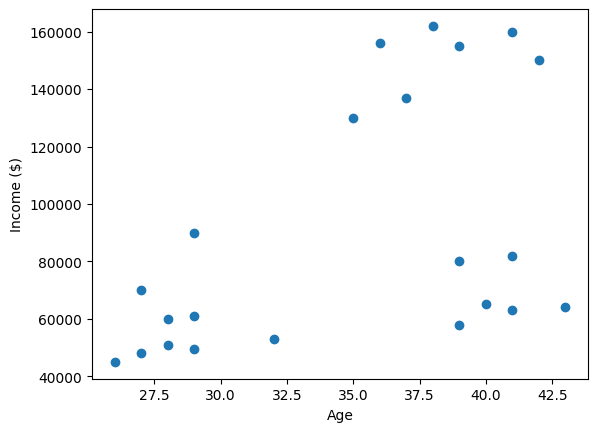

In [78]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [79]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

Train KMeans model

In [80]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [81]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


After clustering visualize the different clusters formed in the data

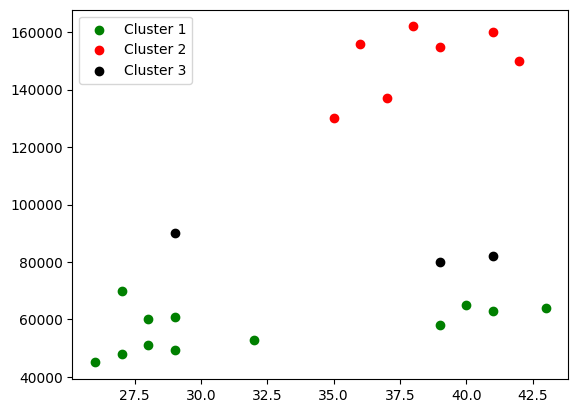

In [82]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label ='Cluster 1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label ='Cluster 2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label ='Cluster 3')

plt.legend()

In [83]:
from sklearn.preprocessing import MinMaxScaler

As we can see from the above scatter plot, the data are not classified properly, this happens because x axis deviates for only 20, but y axis has been deviated from thousands to lakhs.
Thus, using the MinMaxScalar solves this problem as it brings the deviated numbers between 0 and 1

In [84]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])

scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Training the data again after changing columns to 0 and 1

In [85]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [59]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [61]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


From the below scatter plot we can see that, clusters have been differentated well amoung its group

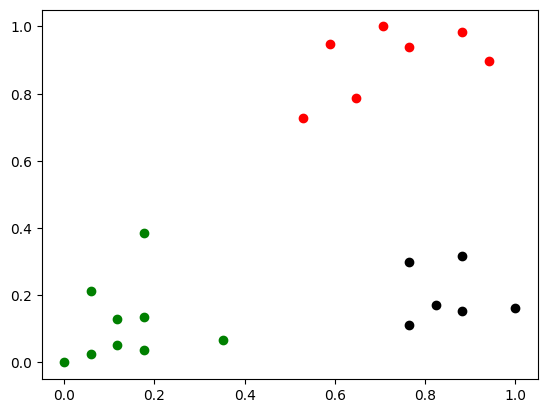

In [62]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')


In [63]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

Taking and visualising centroids of each cluster

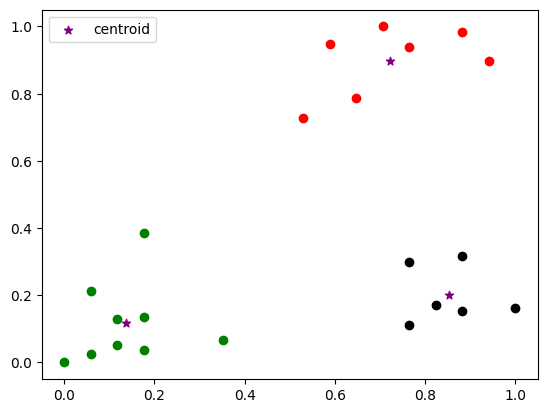

In [64]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.legend()

Elbow method - tells which k value best suits this dataset from the given range

In [66]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(df[['Age', 'Income($)']])
  sse.append(km.inertia_)

In [67]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3923766528801945,
 0.29636232583213024,
 0.26140103788955565,
 0.21487061863544282,
 0.15808085748641154,
 0.12104007625145942]

from this plot we can see that elbow comes under value of 3, hence k =3 is good value

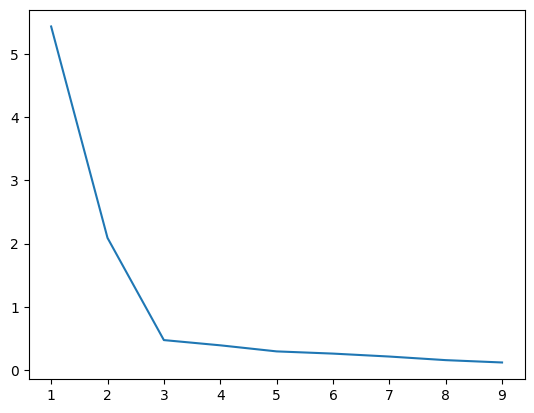

In [68]:
plt.plot(k_rng, sse)

## Exercise

In [107]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [114]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [126]:
df_iris = pd.DataFrame(iris.data, columns =iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [127]:
df_iris['target'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Never assign the df variable if calling inplace.

In [128]:
df_iris.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df_iris.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


Text(0, 0.5, 'petal width (cm)')

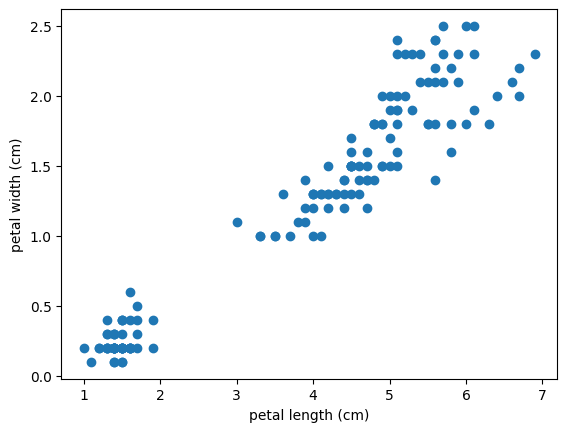

In [129]:
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [130]:
km_iris = KMeans(n_clusters=3)
km_iris

KMeans(n_clusters=3)

In [131]:
y_predicted_iris = km_iris.fit_predict(df_iris)
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

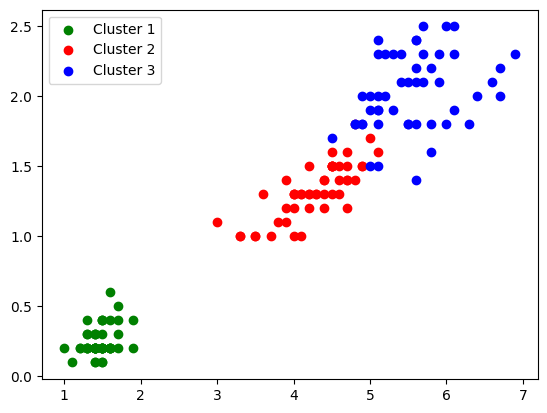

In [132]:
df0_iris = df_iris[df_iris.target ==0]
df1_iris = df_iris[df_iris.target ==1]
df2_iris = df_iris[df_iris.target ==2]

plt.scatter(df0_iris['petal length (cm)'], df0_iris['petal width (cm)'], color='green', label ='Cluster 1')
plt.scatter(df1_iris['petal length (cm)'], df1_iris['petal width (cm)'], color='red', label ='Cluster 2')
plt.scatter(df2_iris['petal length (cm)'], df2_iris['petal width (cm)'], color='blue', label ='Cluster 3')

plt.legend()

In [137]:
print(df_iris.columns)

Index(['petal length (cm)', 'petal width (cm)', 'target'], dtype='object')


In [141]:
scaler_iris = MinMaxScaler()

scaler_iris.fit(df_iris[['petal width (cm)']])
df_iris['petal width (cm)'] = scaler_iris.transform(df_iris[['petal width (cm)']])

scaler_iris.fit(df_iris[['petal length (cm)']])
df_iris['petal length (cm)'] = scaler_iris.transform(df_iris[['petal length (cm)']])

In [142]:
km_iris = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [145]:
y_predicted_iris = km_iris.fit_predict(df_iris)
y_predicted_iris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [146]:
df_iris['cluster'] = y_predicted_iris
df_iris.head()

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1


In [149]:
x= km_iris.cluster_centers_
x

array([[0.55254237, 0.51083333, 1.        ],
       [0.07830508, 0.06083333, 0.        ],
       [0.77152542, 0.8025    , 2.        ]])

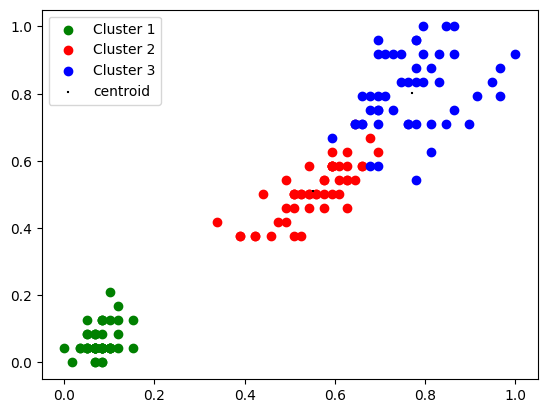

In [151]:
df0_iris = df_iris[df_iris.target ==0]
df1_iris = df_iris[df_iris.target ==1]
df2_iris = df_iris[df_iris.target ==2]

plt.scatter(df0_iris['petal length (cm)'], df0_iris['petal width (cm)'], color='green', label ='Cluster 1')
plt.scatter(df1_iris['petal length (cm)'], df1_iris['petal width (cm)'], color='red', label ='Cluster 2')
plt.scatter(df2_iris['petal length (cm)'], df2_iris['petal width (cm)'], color='blue', label ='Cluster 3')

plt.scatter(x[:,0],x[:,1],x[:,2], color='black', marker='+', label='centroid')
plt.legend()

In [153]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(df_iris[['petal length (cm)', 'petal width (cm)']])
  sse.append(km.inertia_)

In [154]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1826653136050636,
 0.8616150173815893,
 0.7857208721034372,
 0.6203380192606008,
 0.5213547236346292,
 0.44522757987639433]

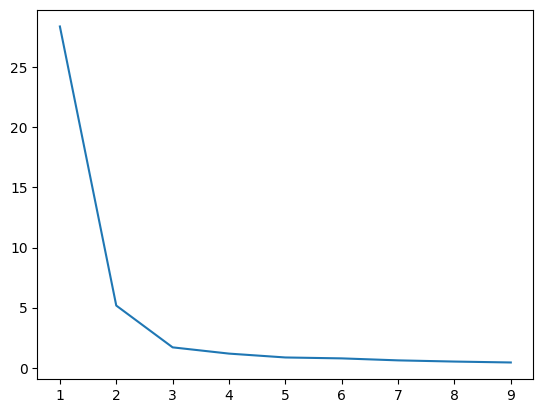

In [155]:
plt.plot(k_rng, sse)